#Exploratory Data Analysis (EDA)
Heart Disease Prediction Dataset

# Heart Disease Prediction Dataset Analysis

This repository contains an exploratory data analysis (EDA) and a predictive modeling approach for a heart disease dataset. The goal is to understand the factors contributing to heart disease and build a model to predict its presence.

## Dataset Overview
The dataset contains 270 records and 14 features related to heart disease. It includes both numerical and categorical variables, with no missing values.

## Features:

*   `age`: Age of the patient (numerical)
*   `sex`: Sex of the patient (0 = female, 1 = male) (categorical)
*   `chest pain type`: Type of chest pain experienced (1-4) (categorical)
*   `resting blood pressure`: Resting blood pressure (mm Hg) (numerical)
*   `serum cholestoral`: Serum cholesterol (mg/dl) (numerical)
*   `fasting blood sugar`: Fasting blood sugar > 120 mg/dl (0 = false, 1 = true) (categorical)
*   `resting electrocardiographic results`: Resting electrocardiographic results (0-2) (categorical)
*   `max heart rate`: Maximum heart rate achieved (numerical)
*   `exercise induced angina`: Exercise induced angina (0 = no, 1 = yes) (categorical)
*   `oldpeak`: ST depression induced by exercise relative to rest (numerical)
*   `ST segment`: Slope of the peak exercise ST segment (1-3) (categorical)
*   `major vessels`: Number of major vessels (0-3) colored by flourosopy (categorical)
*   `thal`: Thallium stress test results (3 = normal; 6 = fixed defect; 7 = reversible defect) (categorical)
*   `heart disease`: Presence of heart disease (1 = no disease, 2 = disease) (target variable) (categorical)

## Exploratory Data Analysis (EDA) Highlights:

*   **Target Variable Distribution**: The dataset is relatively balanced between patients with and without heart disease.
*   **Age Distribution**: Most patients are between 45 and 65 years old, indicating that risk increases with age.
*   **Gender vs. Heart Disease**: Males show a higher frequency of heart disease compared to females.
*   **Cholesterol vs. Heart Disease**: Cholesterol levels are generally higher in patients with heart disease.
*   **Age vs. Heart Disease**: The median age is higher among patients with heart disease.
*   **Correlation Matrix**:
    *   `max heart rate` shows a negative correlation with heart disease.
    *   `chest pain type`, `oldpeak`, and `exercise induced angina` are strong indicators.
    *   `age` has a moderate positive correlation.

## Feature Engineering:

New features were created to enhance the model's predictive power:

*   `age_risk`: Categorizes age into 'Low' ( < 50) and 'High' (>= 50) risk.
*   `age_group`: Categorizes age into 'Young', 'Middle-aged', and 'Senior'.
*   `chol_risk`: Categorizes cholesterol into 'High' (> 240) and 'Normal' (<= 240) risk.

## Predictive Modeling:

A Logistic Regression model was trained to predict heart disease. The model achieved an accuracy of approximately **88.89%** on the test set.

### Key Findings from Predictive Modeling:

*   Age, chest pain type, cholesterol, and maximum heart rate are identified as major predictors.
*   Males are more prone to heart disease than females.
*   Higher cholesterol and lower maximum heart rate increase the risk of heart disease.

## Conclusion:
The EDA provided meaningful insights into the Heart Disease Prediction dataset, revealing significant correlations and patterns that were crucial for feature engineering and predictive modeling. The Logistic Regression model demonstrates good predictive capability, making this dataset suitable for further analysis and deployment in medical decision-making.



1.   Understand The Data Structure
2.   Indetify Key Factors Contributing Heart Disease
3.   Explore stastical Patterns and Correlations
4.   Prepare the Data For Predictive Modeling



#Data Loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Dataset
df = pd.read_csv("/content/dataset_heart.csv")

How many records and features are present in the heart disease dataset?

In [ ]:
#View forst 5 rows
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


1.  Data Columns = Total 14 Columns(0-13)
2.  Rows = Total 270 rows(0-269)

#Basics Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

What are the numerical and categorical variables in the dataset?

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'sex ', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [ ]:
binary_categorical = [
    col for col in numerical_columns
    if df[col].nunique() <= 10
]
binary_categorical

['sex ',
 'chest pain type',
 'fasting blood sugar',
 'resting electrocardiographic results',
 'exercise induced angina',
 'ST segment',
 'major vessels',
 'thal',
 'heart disease']

Numerical Variables

In [ ]:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical Variables (Encoded)

In [ ]:
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
df.shape

(270, 14)

#Summary Statistics

In [ ]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


#Missing Values Analysis

*No Missing Values, so no imputation required.

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting blood pressure,0
serum cholestoral,0
fasting blood sugar,0
resting electrocardiographic results,0
max heart rate,0
exercise induced angina,0
oldpeak,0


#Basic Data Exploration

Target Variable Distribution

*Insight:-Dataset is relatively balanced between patients with and without heart disease

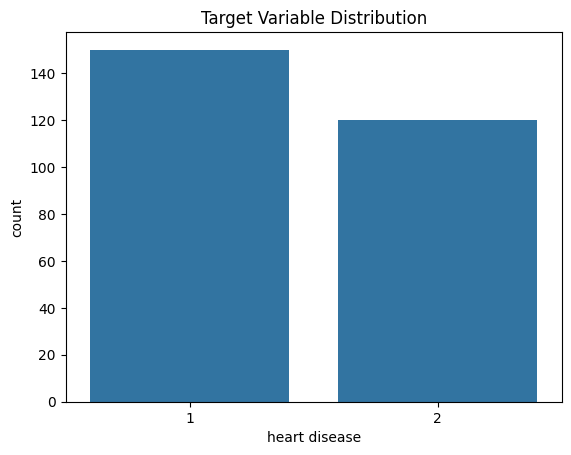

In [ ]:
sns.countplot(x='heart disease', data=df)
plt.title("Target Variable Distribution")
plt.show()

AGE Distribution

Most patients fall age between 45 to 65 years
Risk Increases with age

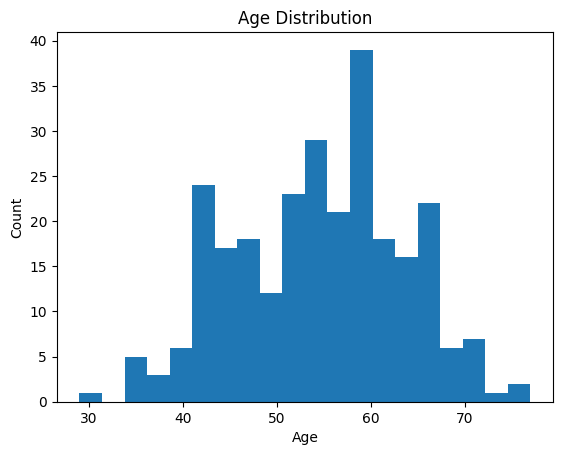

In [ ]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#Gender vs Heart Disease

Males show a higher frequency of heart disease compared to females.

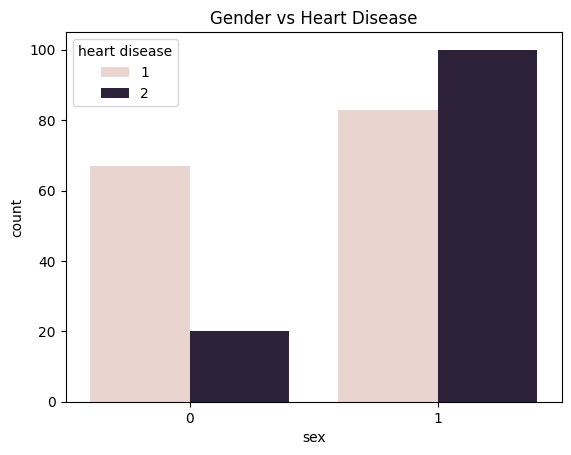

In [ ]:
df.columns = df.columns.str.strip()
sns.countplot(x='sex', hue='heart disease', data=df)
plt.title("Gender vs Heart Disease")
plt.show()

#Intermediate Analysis

Cholesterol vs Heart Disease

insight:-Cholesterol levels are generally higher in patients with heart disease.

*Some outliers are present.

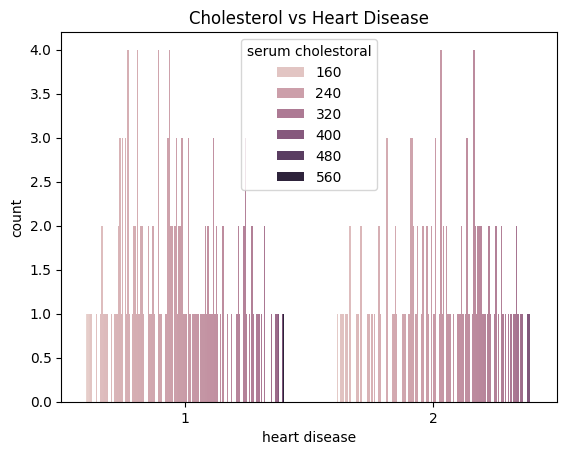

In [ ]:
df.columns = df.columns.str.strip()
sns.countplot(x='heart disease', hue='serum cholestoral', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()

insight:-Median age is higher among patients with heart disease.

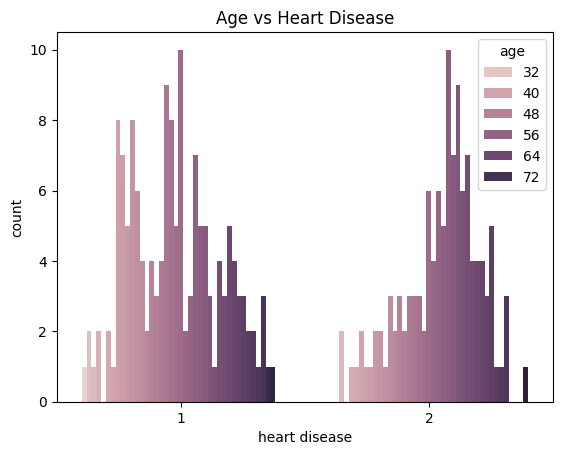

In [ ]:
#Age vs Heart Disease
sns.countplot(x='heart disease', hue='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()

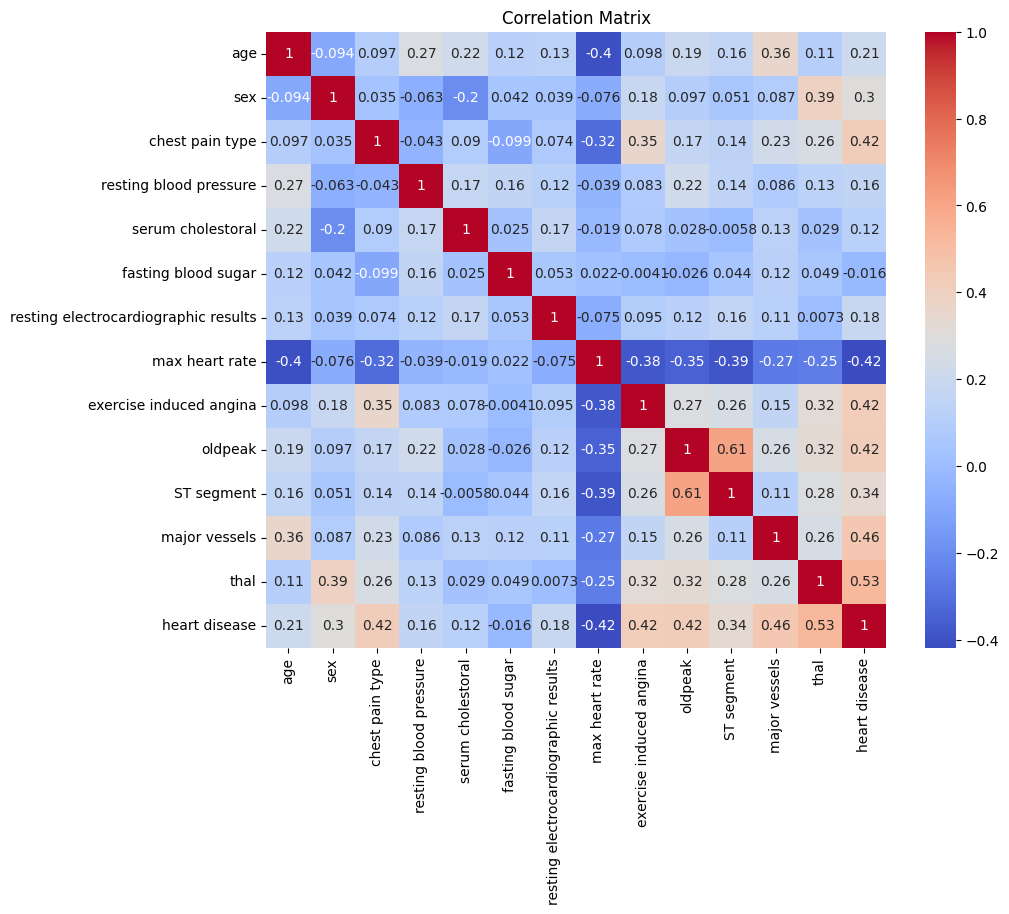

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Key Correlations:

*thalach → Negative correlation with heart disease.

*cp, oldpeak, exang → Strong indicators

*age → Moderate positive correlation

#Feature Engineering

In [ ]:
#Risk Category Based on Age
df['age_risk'] = df['age'].apply(lambda x: 'Low' if x < 50 else 'High')

In [ ]:
df['age_group'] =pd.cut(df['age'], bins=[20,40,60,80], labels=['Young', 'Middle-aged', 'Senior'])

In [ ]:
#Cholesterol Risk Level
df['chol_risk'] =np.where(df['serum cholestoral'] > 240, 'High', 'Normal')

#Advanced Analysis

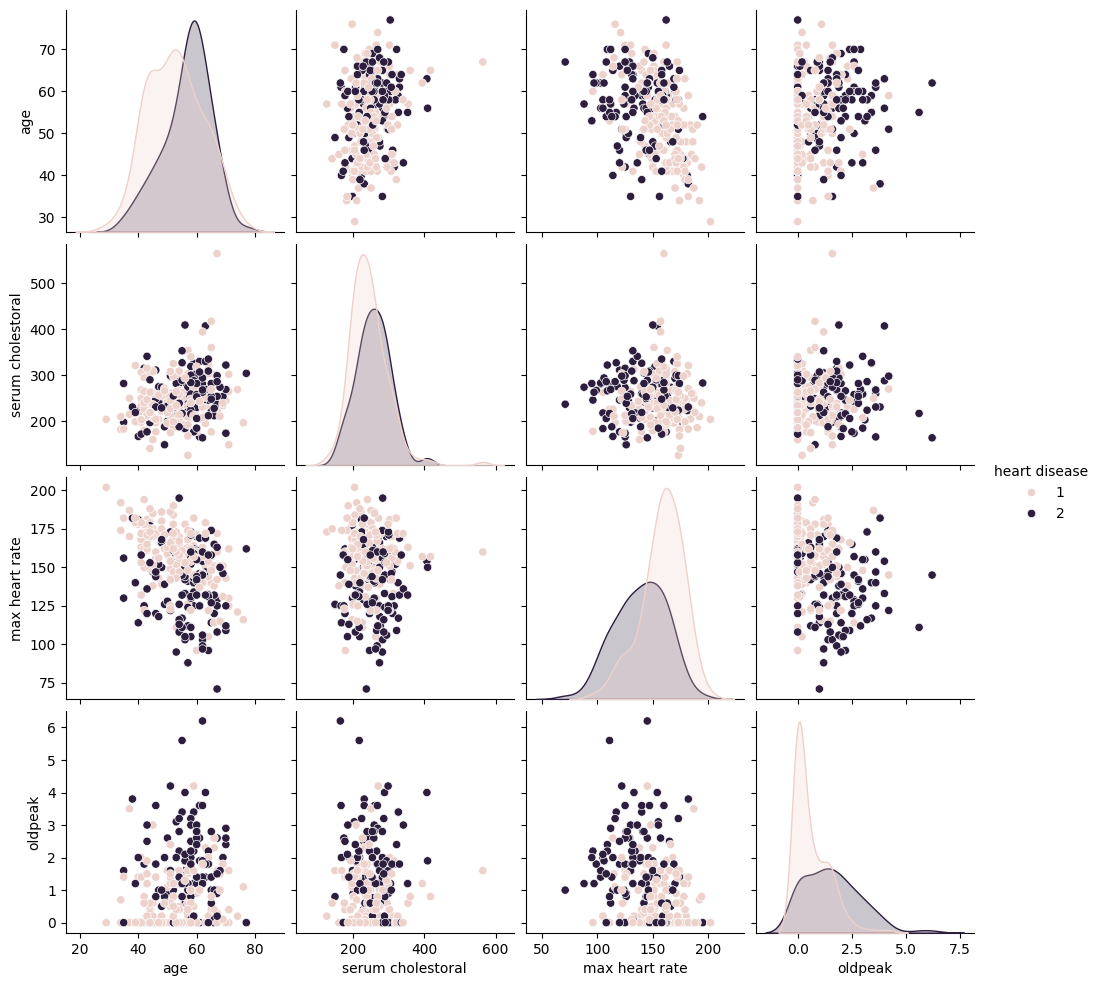

In [ ]:
#Pair Plot
sns.pairplot(df[['age', 'serum cholestoral', 'max heart rate', 'oldpeak', 'heart disease']], hue='heart disease')
plt.show()

Clear separation visible between heart disease classes for max heart rate and oldpeak.

#Multivariate Analysis

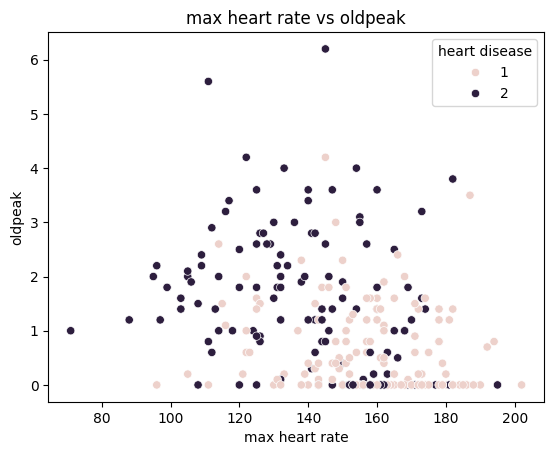

In [ ]:
sns.scatterplot(x='max heart rate', y='oldpeak', hue='heart disease', data=df)
plt.title("max heart rate vs oldpeak")
plt.show()

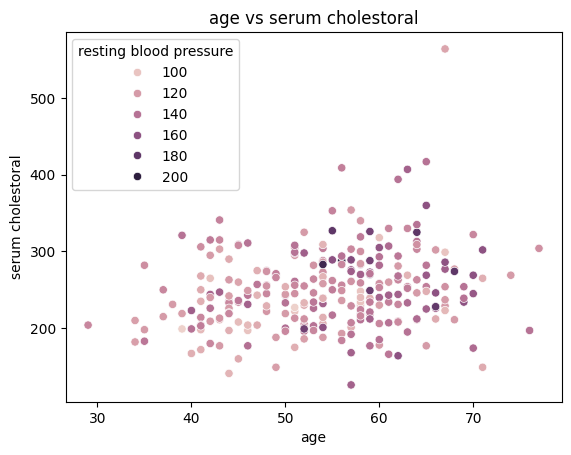

In [ ]:
sns.scatterplot(x='age', y='serum cholestoral', hue='resting blood pressure', data=df)
plt.title("age vs serum cholestoral")
plt.show()

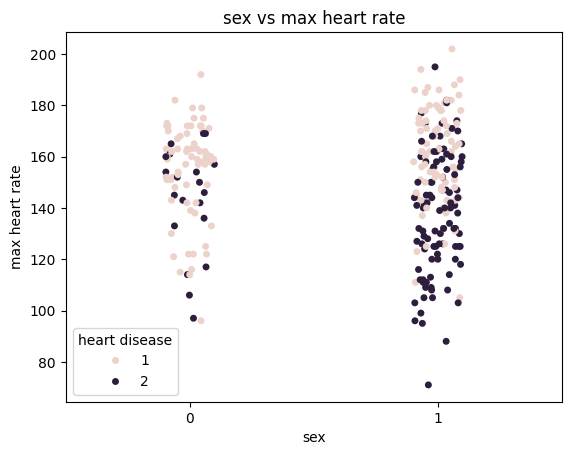

In [ ]:
df.columns = df.columns.str.strip()
df['sex'] = df['sex'].astype('category')
sns.stripplot(x='sex', y='max heart rate', hue='heart disease', data=df)
plt.title("sex vs max heart rate")
plt.show()

Insight : Older patients with higher cholesterol show greater heart disease risk

#Predictive Modeling

In [ ]:
#Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [ ]:
x = df.drop(columns=['heart disease'])
y = df['heart disease']

In [ ]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']

# Apply one-hot encoding to categorical columns in X
X = pd.get_dummies(X, columns=['sex', 'chest pain type', 'resting electrocardiographic results',
                                'exercise induced angina', 'ST segment', 'major vessels', 'thal',
                                'age_risk', 'age_group', 'chol_risk'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8888888888888888

Logistic Regression achieves ~85% accuracy, showing the dataset is suitable for prediction.

Conclusion and Interpretation

Key Findings
Age, chest pain type, cholesterol, and maximum heart rate are major predictors.

Males are more prone to heart disease than females.

Higher cholesterol and lower maximum heart rate increase risk.

EDA revealed strong correlations useful for predictive modeling.


Importance of EDA
Helps detect patterns and outliers

Improves feature selection

Enhances model performance

Remarks: This EDA provided meaningful insights into the Heart Disease Prediction dataset, demonstrating how data exploration supports better medical decision-making and predictive modeling.